In [1]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


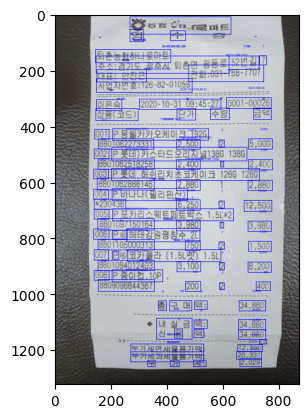

In [5]:
import cv2
import easyocr
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

reader = easyocr.Reader(['ko', 'en'])
result =  reader.readtext('bill1.png')

img = cv2.imread('bill1.png')

img = Image.fromarray(img)
draw = ImageDraw.Draw(img)

for i in result:
  x = i[0][0][0]
  y = i[0][0][1]
  w = i[0][1][0] - i[0][0][0]
  h = i[0][2][1] - i[0][1][1]

  draw.rectangle(((x, y), (x+w, y+h)), outline="blue", width=2)
  draw.text((int((x+x+w)/2), y-40), str(i[1]),  fill="blue")

plt.imshow(img)
plt.show()

https://davelogs.tistory.com/94

/var/folders/pw/w8rt727n6j51gnhj0dxq0xlw0000gn/T/ipykernel_84791/1916948577.py:37: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


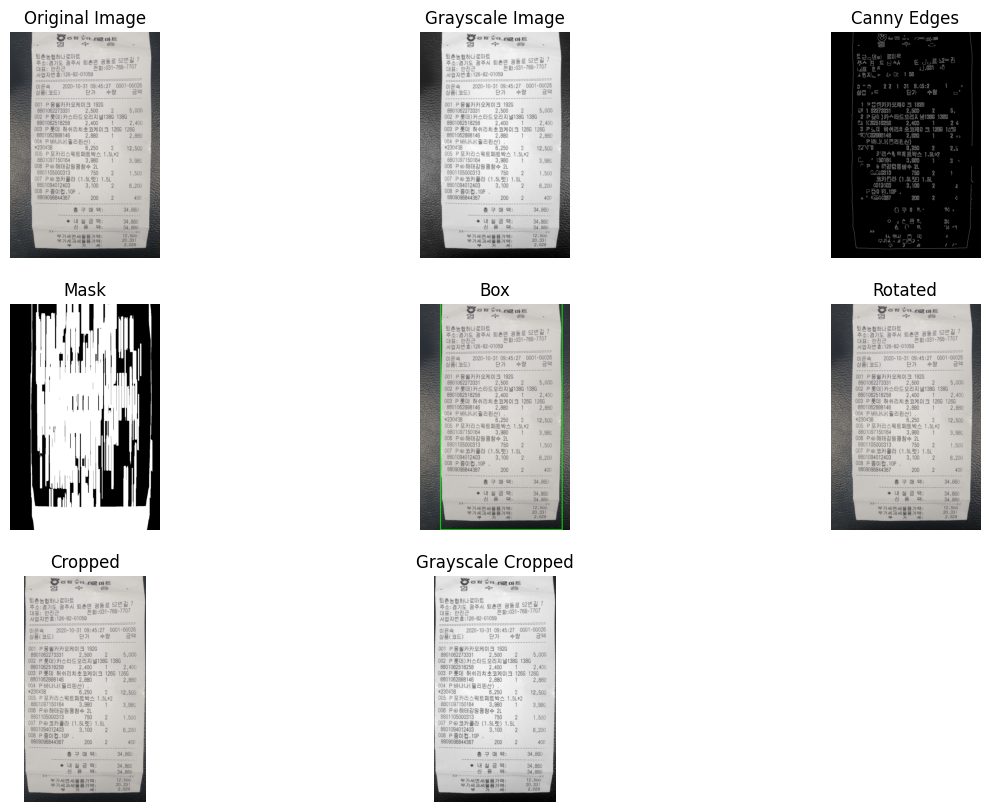

In [14]:
# 이미지 파일 경로 설정
image_path = 'bill1.png'  # 이미지 파일 이름

# 이미지를 읽어들이기
src = cv2.imread(image_path, 1)

# grayscale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# canny
canned = cv2.Canny(gray, 150, 300)

# dilate to close holes in lines
kernel = np.ones((10, 1), np.uint8)  # 가로 1 세로 10
mask = cv2.dilate(canned, kernel, iterations=20)

# contours 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 contours 찾기
biggest_cntr = None
biggest_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > biggest_area:
        biggest_area = area
        biggest_cntr = contour

# 외곽 box
rect = cv2.minAreaRect(biggest_cntr)
box = cv2.boxPoints(rect)
box = np.int0(box)

# 외곽 box 그리기
src_box = src.copy()
cv2.drawContours(src_box, [box], 0, (0, 255, 0), 3)

# angle 계산
angle = rect[-1]
if angle > 45:
    angle = -(90 - angle)

# 기울기 조정
rotated = src.copy()
(h, w) = rotated.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(rotated, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# 회전된 박스 좌표 찾기
ones = np.ones(shape=(len(box), 1))
points_ones = np.hstack([box, ones])
transformed_box = M.dot(points_ones.T).T

y = [transformed_box[0][1], transformed_box[1][1], transformed_box[2][1], transformed_box[3][1]]
x = [transformed_box[0][0], transformed_box[1][0], transformed_box[2][0], transformed_box[3][0]]

y1, y2 = int(min(y)), int(max(y))
x1, x2 = int(min(x)), int(max(x))

# crop
crop = rotated[y1:y2, x1:x2]

# 흑백처리
gray2 = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

# 이미지 출력
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(canned, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(src_box, cv2.COLOR_BGR2RGB))
plt.title('Box')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.title('Cropped')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(gray2, cmap='gray')
plt.title('Grayscale Cropped')
plt.axis('off')

plt.show()


In [15]:
src = cv2.imread('bill1.png', 1)

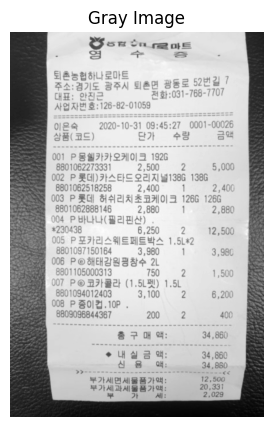

In [23]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# 이미지 출력
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.show()

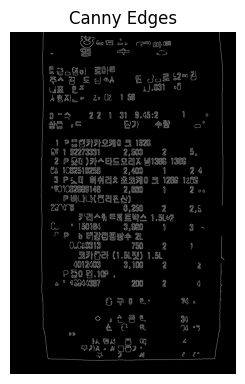

In [26]:
canned = cv2.Canny(gray, 150, 300)

plt.subplot(1, 2, 2)
plt.imshow(canned, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.show()

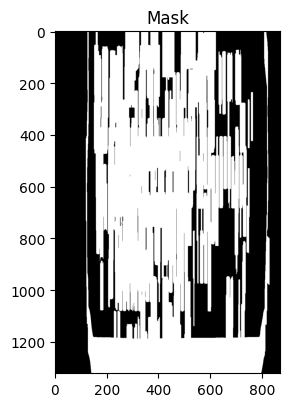

In [28]:
kernel = np.ones((10,1),np.uint8) # 가로 1 세로 10
mask = cv2.dilate(canned, kernel, iterations = 20)

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

plt.show()

/var/folders/pw/w8rt727n6j51gnhj0dxq0xlw0000gn/T/ipykernel_84791/1160436821.py:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


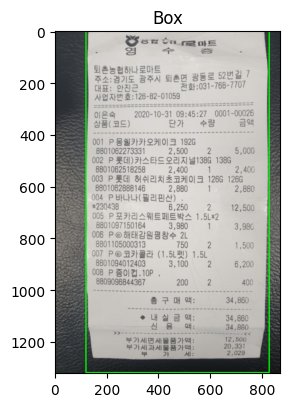

In [29]:
# contours 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 contours 찾기
biggest_cntr = None
biggest_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > biggest_area:
        biggest_area = area
        biggest_cntr = contour

# 외곽 box
rect = cv2.minAreaRect(biggest_cntr)
box = cv2.boxPoints(rect)
box = np.int0(box)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(src_box, cv2.COLOR_BGR2RGB))
plt.title('Box')

plt.show()

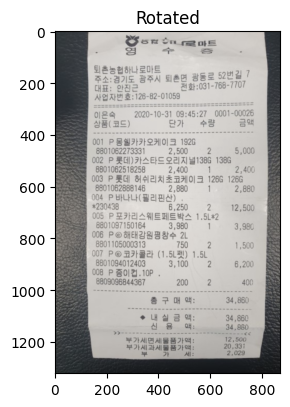

In [30]:
# angle 계산
angle = rect[-1]
if angle > 45:
    angle = -(90 - angle)

# 기울기 조정
rotated = src.copy()
(h, w) = rotated.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(rotated, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated')

plt.show()

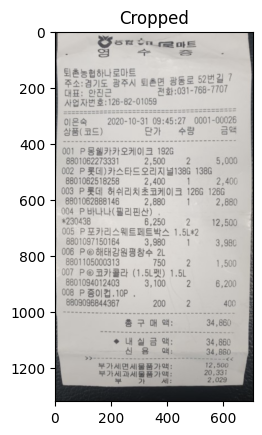

In [31]:
# 회전된 박스 좌표 찾기
ones = np.ones(shape=(len(box), 1))
points_ones = np.hstack([box, ones])
transformed_box = M.dot(points_ones.T).T

y = [transformed_box[0][1], transformed_box[1][1], transformed_box[2][1], transformed_box[3][1]]
x = [transformed_box[0][0], transformed_box[1][0], transformed_box[2][0], transformed_box[3][0]]

y1, y2 = int(min(y)), int(max(y))
x1, x2 = int(min(x)), int(max(x))

# crop
crop = rotated[y1:y2, x1:x2]

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.title('Cropped')

plt.show()

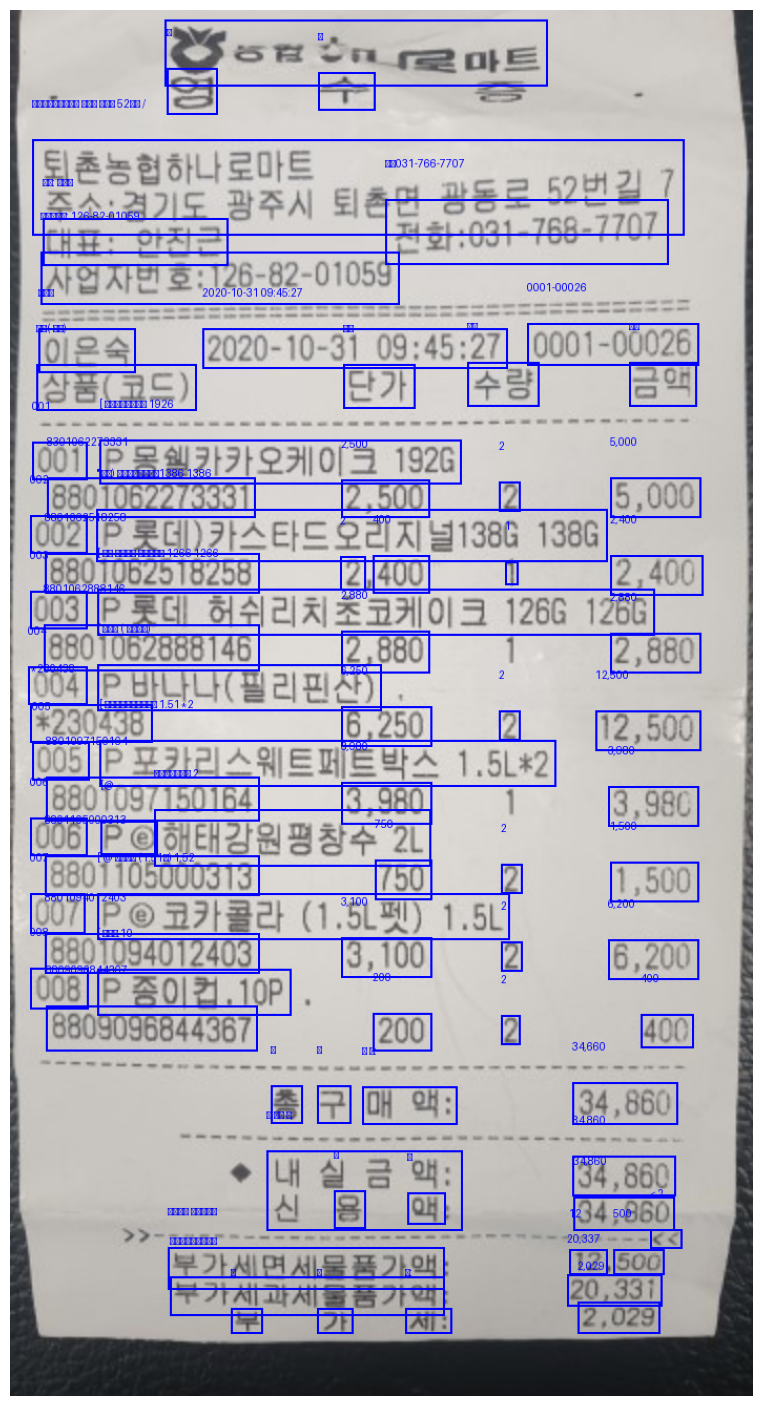

In [41]:
 # 전처리된 이미지를 EasyOCR로 처리하여 텍스트 인식
result = reader.readtext(crop)
reader = easyocr.Reader(['ko'])  # 한글 폰트 사용

# 파란색 상자를 그리기 위한 PIL 이미지로 변환
img = Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(img)

# 각 텍스트 주위에 상자를 그리고 텍스트를 쓰기
for detection in result:
    bbox = detection[0]
    text = detection[1]
    # 상자 좌표
    x_min, y_min = bbox[0]
    x_max, y_max = bbox[2]
    # 파란색 상자 그리기
    draw.rectangle([x_min, y_min, x_max, y_max], outline="blue", width=2)
    # 텍스트 쓰기
    draw.text((x_min, y_min - 40), text, fill="blue")

# 이미지 출력
plt.figure(figsize=(25, 18))  # 이미지를 크게 표시하기 위해 figure 크기를 조정합니다

plt.imshow(img)
plt.axis('off')
plt.show()
